### EDA_Totales Accesos Por Tecnología.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Totales de accesos a internet desglosados por tecnología."**, proporcionando 
una visión sobre qué tecnologías predominan en la conectividad de los usuarios.

### Objetivo del Análisis
El propósito de este análisis es **comparar las tecnologías de conexión disponibles en Argentina**, detectando tendencias 
en el uso de ADSL, fibra Óptica, cable módem, entre otras.



In [32]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Totales Accesos Por Tecnología.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [33]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra Óptica', 'Wireless', 'Otros', 'Total', 'Periodo', 'Trimestre_Label']


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              42 non-null     int64 
 1   Trimestre        42 non-null     int64 
 2   ADSL             42 non-null     int64 
 3   Cablemodem       42 non-null     int64 
 4   Fibra Óptica     42 non-null     int64 
 5   Wireless         42 non-null     int64 
 6   Otros            42 non-null     int64 
 7   Total            42 non-null     int64 
 8   Periodo          42 non-null     object
 9   Trimestre_Label  42 non-null     object
dtypes: int64(8), object(2)
memory usage: 3.4+ KB
None


In [35]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [36]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [37]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              42 non-null     int64 
 1   Trimestre        42 non-null     int64 
 2   ADSL             42 non-null     int64 
 3   Cablemodem       42 non-null     int64 
 4   Fibra Óptica     42 non-null     int64 
 5   Wireless         42 non-null     int64 
 6   Otros            42 non-null     int64 
 7   Total            42 non-null     int64 
 8   Periodo          42 non-null     object
 9   Trimestre_Label  42 non-null     object
dtypes: int64(8), object(2)
memory usage: 3.4+ KB
None


In [38]:
import sweetviz as sv
from skimpy import skim

In [39]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              42 non-null     int64 
 1   Trimestre        42 non-null     int64 
 2   ADSL             42 non-null     int64 
 3   Cablemodem       42 non-null     int64 
 4   Fibra Óptica     42 non-null     int64 
 5   Wireless         42 non-null     int64 
 6   Otros            42 non-null     int64 
 7   Total            42 non-null     int64 
 8   Periodo          42 non-null     object
 9   Trimestre_Label  42 non-null     object
dtypes: int64(8), object(2)
memory usage: 3.4+ KB
None
    Año  Trimestre     ADSL  Cablemodem  Fibra Óptica  Wireless   Otros  \
0  2024          2   733491     5867504       4169958    593197  191957   
1  2024          1   774475     5986957       4015101    598682  257941   
2  2023          4   836390     6022532       3908183    585760  194796   
3 

In [40]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42     │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Año           │  0 │    0 │    2019 │   3.075 │    2014 │    2016 │    2019 │     2021 │     2024 │ ▇▇▃▇▇▆ │  │
│ │ Trimestre     │  0 │    0 │   2.452 │   1.131 │       1 │    1.25 │       2 │        3 │        4 │ ▇ ▇ ▇▇ │  │
│ │ ADSL          │  0 │    0 │ 2695000 │ 1094000 │  733500 │ 1731000 │ 3062000 │  3713000 │  3803000 │ ▂▂▂▁▁▇ │  │
│ │ Cablemodem    │  0 │    0 │ 4434000 │ 1320000 │ 2407000 │ 3146000 │ 4536000 │  5857000 │  6073000 │ ▆▃▃▂▃▇ │  │
│ │ Fibra Óptica  │  0 │    0 │ 1225000 │ 1321000 │  139200 │  171900 │  698900 │  1946000 │  4170000 │ ▇▃▁▁▁▁ │  │
│ │ Wireless      │  0 │    0 │  304300 │  203200 │   70750 │   85390 │  292200 │   515400 │   598700 │ ▇▁▁▃▁▅ │  │
│ │ Otros         │  0 │    0 │  158200 │   82360 │   54300 │   70430 │  185200 │   244100 │   265300 │ ▇▂▁▂▃▇ │  │
│ │ Total         │  0 │    0 │ 8816000 │ 1733000 │ 6398000 │ 7218000 │ 8721000 │ 10390000 │ 11630000 │ ▇▅▃▅▂▆ │  │
│ └───────────────┴────┴──────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Periodo   │  0 │    0 │ Abr-Jun   │ Jul-Sept  │ Abr-Jun   │ Oct-Dic   │      12.2 │         2 │         84 │  │
│ │           │    │      │ 2024      │ 2023      │ 2014      │ 2023      │           │           │            │  │
│ │ Trimestre │  0 │    0 │ Q2        │ Q2        │ Q1        │ Q4        │         2 │         1 │         42 │  │
│ │ _Label    │    │      │           │           │           │           │           │           │            │  │
│ └───────────┴────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
                Año  Trimestre          ADSL    Cablemodem  Fibra Óptica  \
count     42.000000  42.000000  4.200000e+01  4.200000e+01  4.200000e+01   
unique          NaN        NaN           NaN           NaN           NaN   
top             NaN        NaN           NaN           NaN           NaN   
freq            NaN        NaN           NaN           NaN           NaN   
mean    2018.761905   2.452381  2.694844e+06  4.433906e+06  1.224694e+06   
std        3.074756   1.130560  1.094347e+06  1.319783e+06  1.321136e+06   
min     2014.000000   1.000000  7.334910e+05  2.407330e+06  1.391870e+05   
25%     2016.000000   1.250000  1.730869e+06  3.146292e+06  1.719410e+05   
50%     2019.000000   2.000000  3.061623e+06  4.535507e+06  6.989465e+05   
75%     2021.000000   3.000000  3.713298e+06  5.857192e+06  1.945689e+06   
max     2024.000000   4.000000  3.803024e+06  6.073426e+06  4.169958e+06   

             

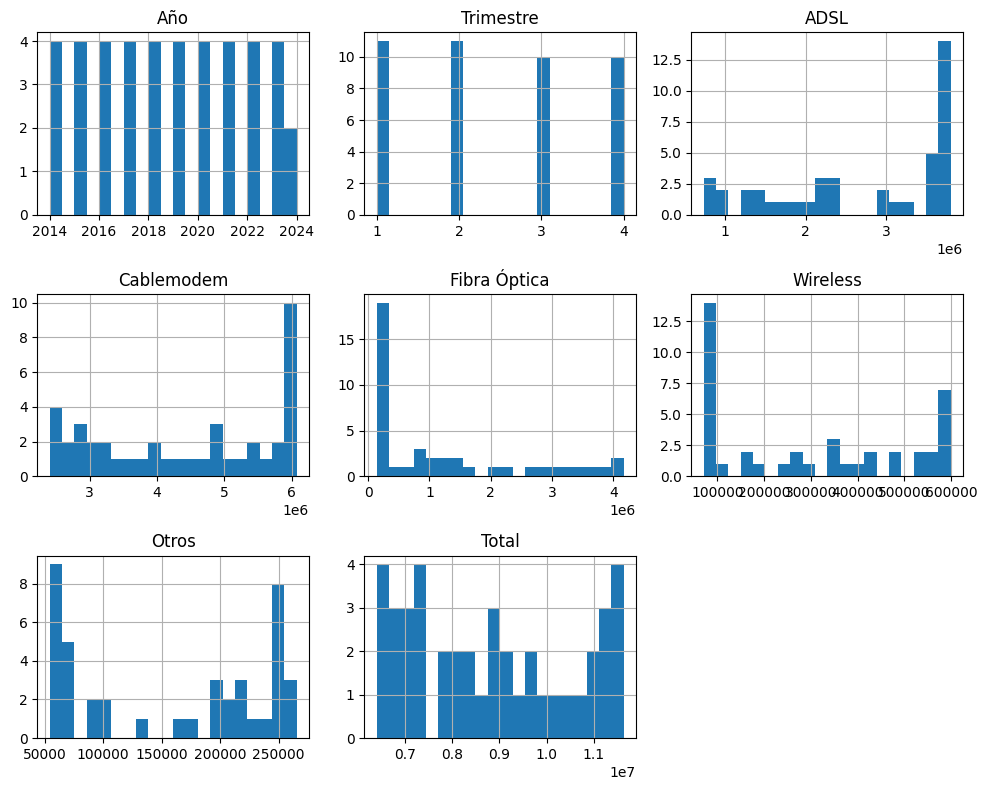

In [41]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

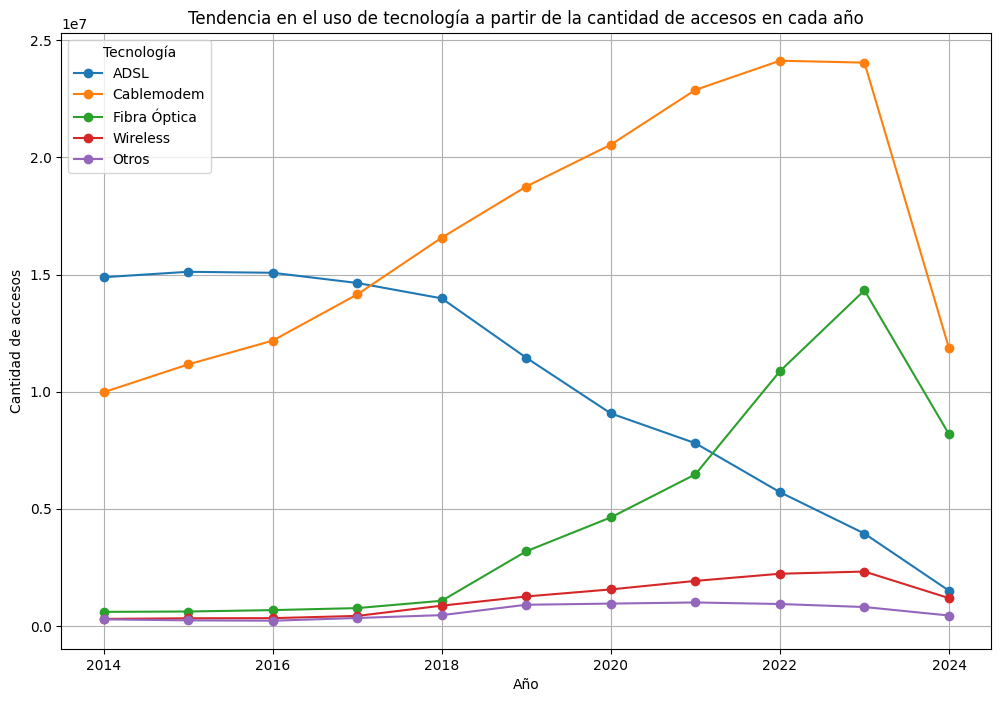

In [42]:
# Agrupar los datos por año y sumar las cantidades de accesos para cada tecnología
df_agrupado = df.groupby('Año').sum()

# Graficar la tendencia de cada tecnología a lo largo de los años
plt.figure(figsize=(12, 8))
for columna in ['ADSL', 'Cablemodem', 'Fibra Óptica', 'Wireless', 'Otros']:
    plt.plot(df_agrupado.index, df_agrupado[columna], marker='o', label=columna)

plt.title('Tendencia en el uso de tecnología a partir de la cantidad de accesos en cada año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()


Matriz de correlación entre columnas numéricas:
                   Año  Trimestre      ADSL  Cablemodem  Fibra Óptica  \
Año           1.000000  -0.073505 -0.951631    0.976749      0.903746   
Trimestre    -0.073505   1.000000  0.005384    0.037978     -0.013996   
ADSL         -0.951631   0.005384  1.000000   -0.935436     -0.967687   
Cablemodem    0.976749   0.037978 -0.935436    1.000000      0.850233   
Fibra Óptica  0.903746  -0.013996 -0.967687    0.850233      1.000000   
Wireless      0.968878   0.016742 -0.979094    0.979382      0.918549   
Otros         0.831267   0.025812 -0.803222    0.897399      0.660437   
Total         0.984889   0.024840 -0.971494    0.976403      0.937763   

              Wireless     Otros     Total  
Año           0.968878  0.831267  0.984889  
Trimestre     0.016742  0.025812  0.024840  
ADSL         -0.979094 -0.803222 -0.971494  
Cablemodem    0.979382  0.897399  0.976403  
Fibra Óptica  0.918549  0.660437  0.937763  
Wireless      1.000000 

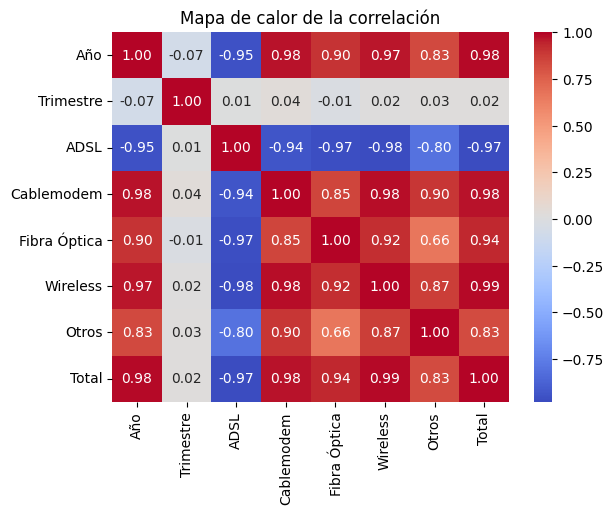

In [43]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [44]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Periodo y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Periodo                        
Abr-Jun 2014      0   1   0   0
Abr-Jun 2015      0   1   0   0
Abr-Jun 2016      0   1   0   0
Abr-Jun 2017      0   1   0   0
Abr-Jun 2018      0   1   0   0
Abr-Jun 2019      0   1   0   0
Abr-Jun 2020      0   1   0   0
Abr-Jun 2021      0   1   0   0
Abr-Jun 2022      0   1   0   0
Abr-Jun 2023      0   1   0   0
Abr-Jun 2024      0   1   0   0
Ene-Mar 2014      1   0   0   0
Ene-Mar 2015      1   0   0   0
Ene-Mar 2016      1   0   0   0
Ene-Mar 2017      1   0   0   0
Ene-Mar 2018      1   0   0   0
Ene-Mar 2019      1   0   0   0
Ene-Mar 2020      1   0   0   0
Ene-Mar 2021      1   0   0   0
Ene-Mar 2022      1   0   0   0
Ene-Mar 2023      1   0   0   0
Ene-Mar 2024      1   0   0   0
Jul-Sept 2014     0   0   1   0
Jul-Sept 2015     0   0   1   0
Jul-Sept 2016     0   0   1   0
Jul-Sept 2017     0   0   1   0
Jul-Sept 2018     0   0   1   0
Jul-Sept 2019    

Tabla de contingencia entre Periodo y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Periodo                        
Abr-Jun 2014      0   1   0   0
Abr-Jun 2015      0   1   0   0
Abr-Jun 2016      0   1   0   0
Abr-Jun 2017      0   1   0   0
Abr-Jun 2018      0   1   0   0
Abr-Jun 2019      0   1   0   0
Abr-Jun 2020      0   1   0   0
Abr-Jun 2021      0   1   0   0
Abr-Jun 2022      0   1   0   0
Abr-Jun 2023      0   1   0   0
Abr-Jun 2024      0   1   0   0
Ene-Mar 2014      1   0   0   0
Ene-Mar 2015      1   0   0   0
Ene-Mar 2016      1   0   0   0
Ene-Mar 2017      1   0   0   0
Ene-Mar 2018      1   0   0   0
Ene-Mar 2019      1   0   0   0
Ene-Mar 2020      1   0   0   0
Ene-Mar 2021      1   0   0   0
Ene-Mar 2022      1   0   0   0
Ene-Mar 2023      1   0   0   0
Ene-Mar 2024      1   0   0   0
Jul-Sept 2014     0   0   1   0
Jul-Sept 2015     0   0   1   0
Jul-Sept 2016     0   0   1   0
Jul-Sept 2017     0   0   1   0
Jul-Sept 2018     0   0   1   0
Jul-Sept 2019    

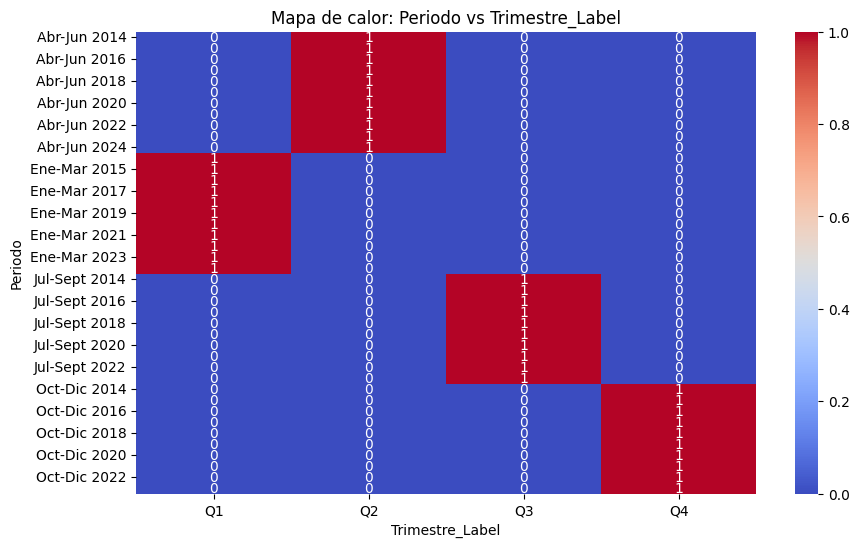

Tabla de contingencia entre Trimestre_Label y Periodo:
Periodo          Abr-Jun 2014  Abr-Jun 2015  Abr-Jun 2016  Abr-Jun 2017  \
Trimestre_Label                                                           
Q1                          0             0             0             0   
Q2                          1             1             1             1   
Q3                          0             0             0             0   
Q4                          0             0             0             0   

Periodo          Abr-Jun 2018  Abr-Jun 2019  Abr-Jun 2020  Abr-Jun 2021  \
Trimestre_Label                                                           
Q1                          0             0             0             0   
Q2                          1             1             1             1   
Q3                          0             0             0             0   
Q4                          0             0             0             0   

Periodo          Abr-Jun 2022  Abr-Jun 2023

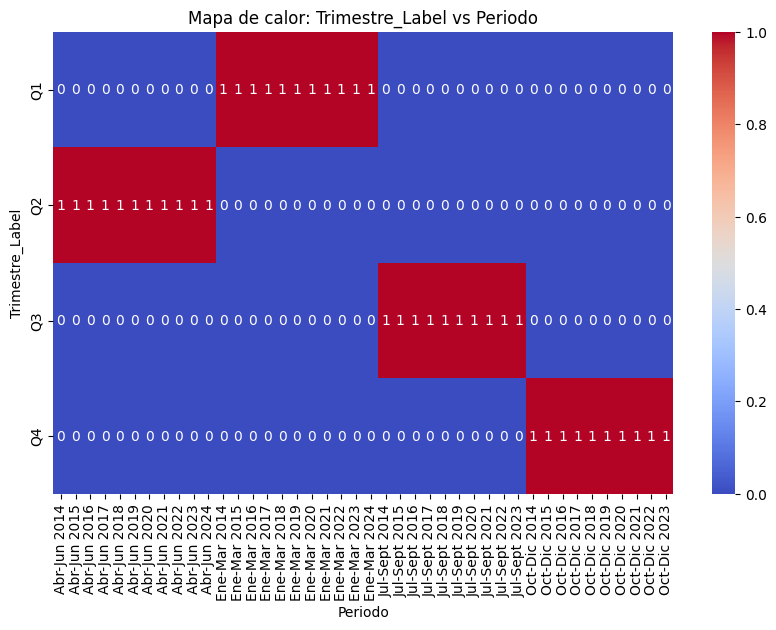

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [46]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
         Año  Trimestre      ADSL  Cablemodem  Fibra Óptica  Wireless  \
0   1.724231  -0.404989 -1.813984    1.099405      2.256366  1.438988   
1   1.724231  -1.300229 -1.776080    1.191011      2.137730  1.466308   
2   1.395060   1.385490 -1.718817    1.218293      2.055820  1.401945   
3   1.395060   0.490250 -1.661933    1.215456      1.903010  1.380408   
4   1.395060  -0.404989 -1.561480    1.198827      1.715522  1.382336   
5   1.395060  -1.300229 -1.378442    1.202994      1.546538  1.356555   
6   1.065888   1.385490 -1.275823    1.229739      1.406468  1.338235   
7   1.065888   0.490250 -1.201922    1.225531      1.261649  1.259244   
8   1.065888  -0.404989 -1.134356    1.185073      1.148070  1.254925   
9   1.065888  -1.300229 -1.074325    1.257323      0.762146  1.202980   
10  0.736717   1.385490 -0.959295    1.188928      0.649302  1.089880   
11  0.736717   0.490250 -0.688296    1.067773      0.261511  0.937007   
12  0.736717  

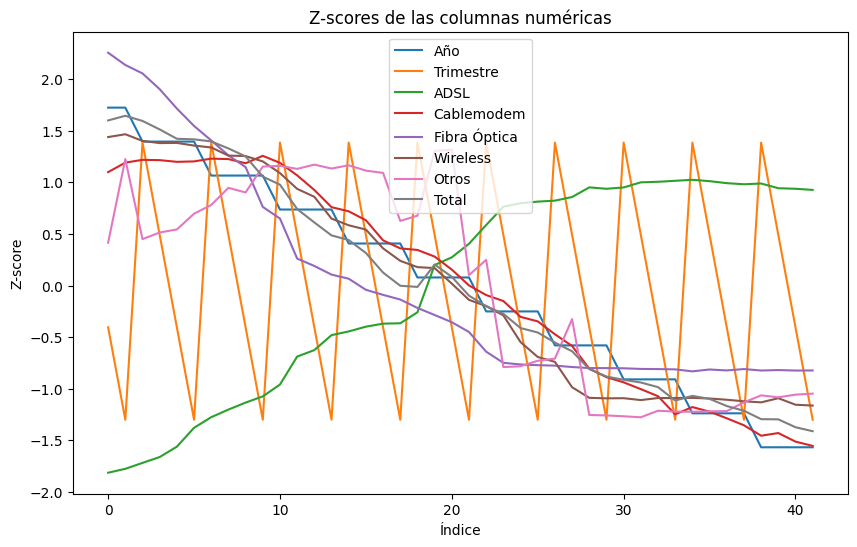

In [47]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [48]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Periodo':
Periodo
Abr-Jun 2024     1
Ene-Mar 2024     1
Oct-Dic 2023     1
Jul-Sept 2023    1
Abr-Jun 2023     1
Ene-Mar 2023     1
Oct-Dic 2022     1
Jul-Sept 2022    1
Abr-Jun 2022     1
Ene-Mar 2022     1
Oct-Dic 2021     1
Jul-Sept 2021    1
Abr-Jun 2021     1
Ene-Mar 2021     1
Oct-Dic 2020     1
Jul-Sept 2020    1
Abr-Jun 2020     1
Ene-Mar 2020     1
Oct-Dic 2019     1
Jul-Sept 2019    1
Abr-Jun 2019     1
Ene-Mar 2019     1
Oct-Dic 2018     1
Jul-Sept 2018    1
Abr-Jun 2018     1
Ene-Mar 2018     1
Oct-Dic 2017     1
Jul-Sept 2017    1
Abr-Jun 2017     1
Ene-Mar 2017     1
Oct-Dic 2016     1
Jul-Sept 2016    1
Abr-Jun 2016     1
Ene-Mar 2016     1
Oct-Dic 2015     1
Jul-Sept 2015    1
Abr-Jun 2015     1
Ene-Mar 2015     1
Oct-Dic 2014     1
Jul-Sept 2014    1
Abr-Jun 2014     1
Ene-Mar 2014     1
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2    11
Q1    11
Q4    10
Q3    10
Name: count, d

In [49]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


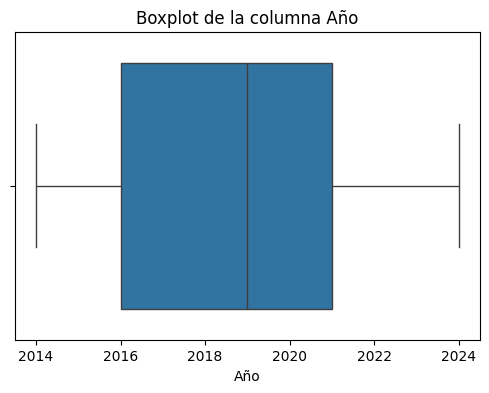

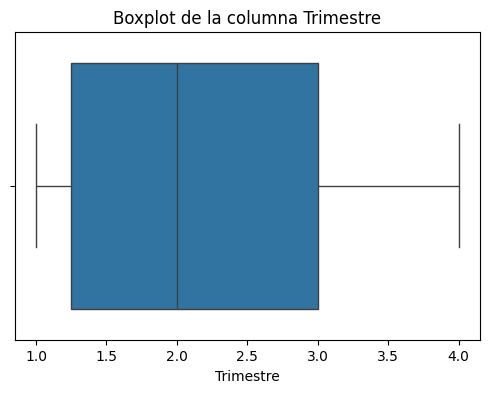

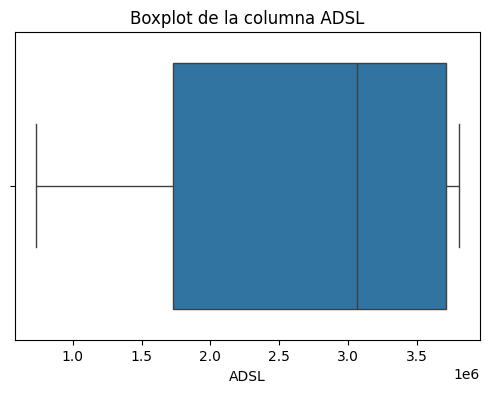

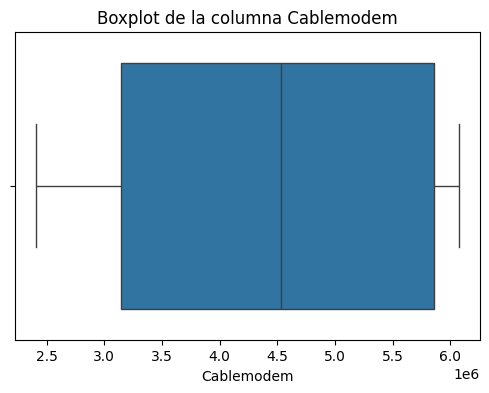

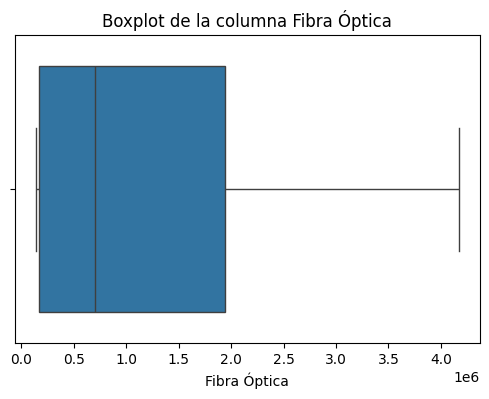

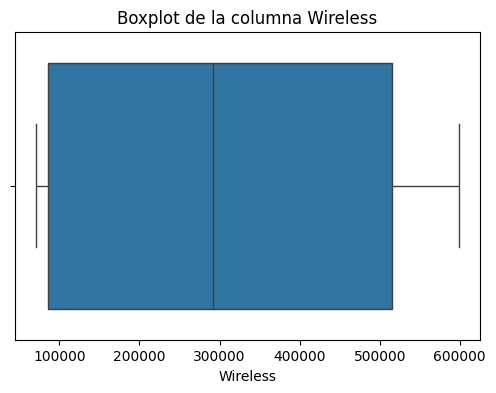

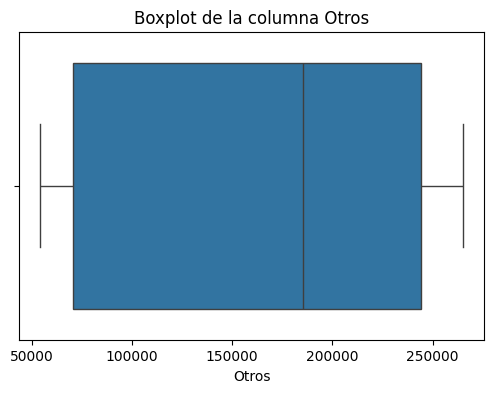

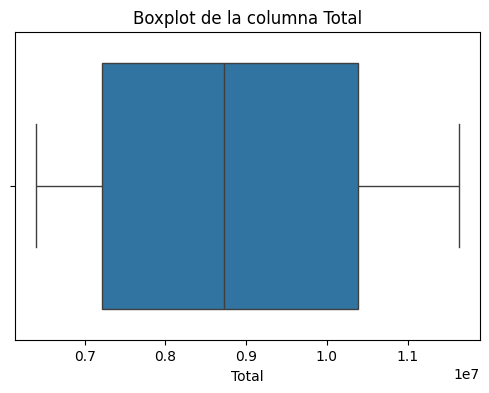

In [50]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [51]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                0
Trimestre          0
ADSL               0
Cablemodem         0
Fibra Óptica       0
Wireless           0
Otros              0
Total              0
Periodo            0
Trimestre_Label    0
dtype: int64


In [61]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Totales Accesos Por Tecnología.csv


In [53]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año             0.024172
Trimestre       0.070729
ADSL           -0.493080
Cablemodem     -0.136182
Fibra Óptica    1.046036
Wireless        0.178800
Otros          -0.086408
Total           0.256071
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año            -1.186795
Trimestre      -1.371727
ADSL           -1.323894
Cablemodem     -1.546603
Fibra Óptica   -0.299087
Wireless       -1.628079
Otros          -1.787841
Total          -1.319854
dtype: float64


In [54]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
       Variable           VIF
0         const  5.441139e+07
1           Año  1.247411e+02
2     Trimestre  2.394504e+00
3          ADSL           inf
4    Cablemodem           inf
5  Fibra Óptica           inf
6      Wireless           inf
7         Otros           inf
8         Total           inf


c:\Program Files\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


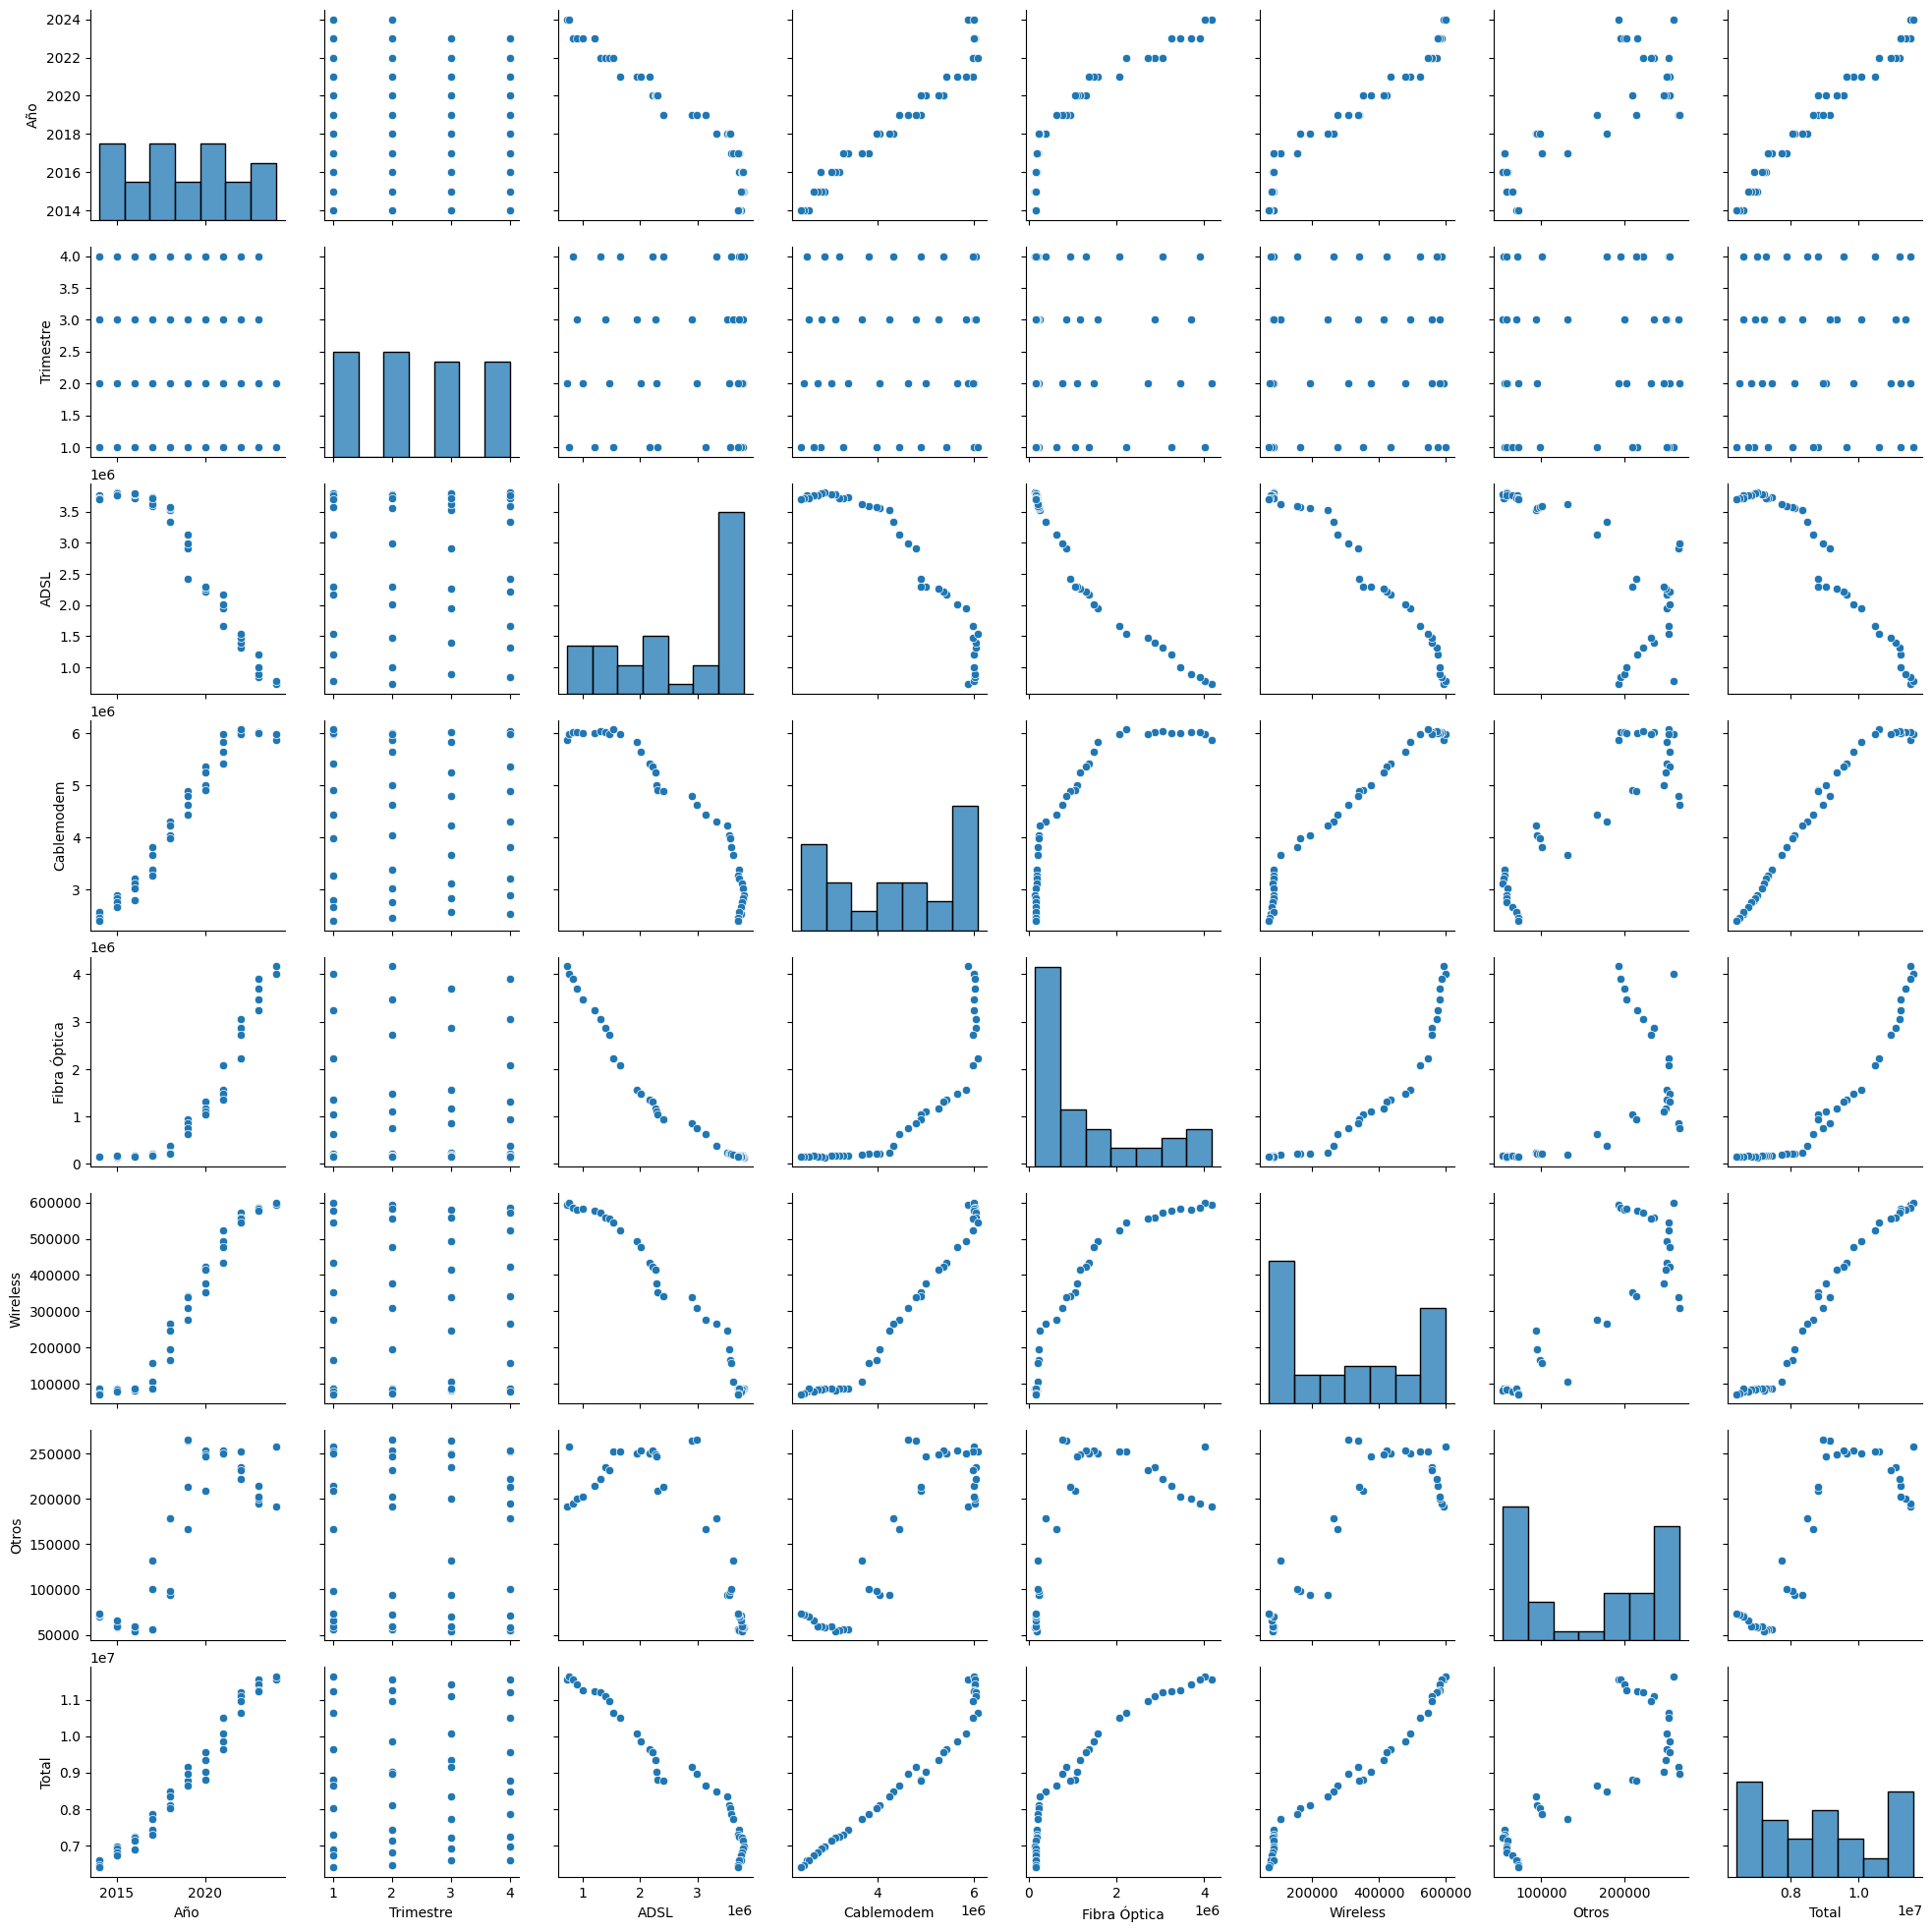

In [55]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [56]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Periodo':
                Año                                                      \
              count    mean std     min     25%     50%     75%     max   
Periodo                                                                   
Abr-Jun 2014    1.0  2014.0 NaN  2014.0  2014.0  2014.0  2014.0  2014.0   
Abr-Jun 2015    1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Abr-Jun 2016    1.0  2016.0 NaN  2016.0  2016.0  2016.0  2016.0  2016.0   
Abr-Jun 2017    1.0  2017.0 NaN  2017.0  2017.0  2017.0  2017.0  2017.0   
Abr-Jun 2018    1.0  2018.0 NaN  2018.0  2018.0  2018.0  2018.0  2018.0   
Abr-Jun 2019    1.0  2019.0 NaN  2019.0  2019.0  2019.0  2019.0  2019.0   
Abr-Jun 2020    1.0  2020.0 NaN  2020.0  2020.0  2020.0  2020.0  2020.0   
Abr-Jun 2021    1.0  2021.0 NaN  2021.0  2021.0  2021.0  2021.0  2021.0   
Abr-Jun 2022    1.0  2022.0 NaN  2022.0  2022.0  2022.0  2022.0  2022.0   
Abr-Jun 2023    1.0  2023.0 NaN  2023.0  2023.0  2023.0  2023.

In [57]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Periodo':
                  Año  Trimestre       ADSL  Cablemodem  Fibra Óptica  \
Periodo                                                                 
Abr-Jun 2014   2014.0        2.0  3708882.0   2461670.0      149363.0   
Abr-Jun 2015   2015.0        2.0  3767821.0   2756294.0      150839.0   
Abr-Jun 2016   2016.0        2.0  3782085.0   3035272.0      167788.0   
Abr-Jun 2017   2017.0        2.0  3723518.0   3383434.0      180777.0   
Abr-Jun 2018   2018.0        2.0  3557216.0   4038141.0      226285.0   
Abr-Jun 2019   2019.0        2.0  2990457.0   4635575.0      760794.0   
Abr-Jun 2020   2020.0        2.0  2295533.0   5005115.0     1106725.0   
Abr-Jun 2021   2021.0        2.0  2018587.0   5641731.0     1472246.0   
Abr-Jun 2022   2022.0        2.0  1468333.0   5979214.0     2723285.0   
Abr-Jun 2023   2023.0        2.0  1006509.0   5997149.0     3463988.0   
Abr-Jun 2024   2024.0        2.0   733491.0   5867504.0     4169958.0   
Ene-Mar 2014 

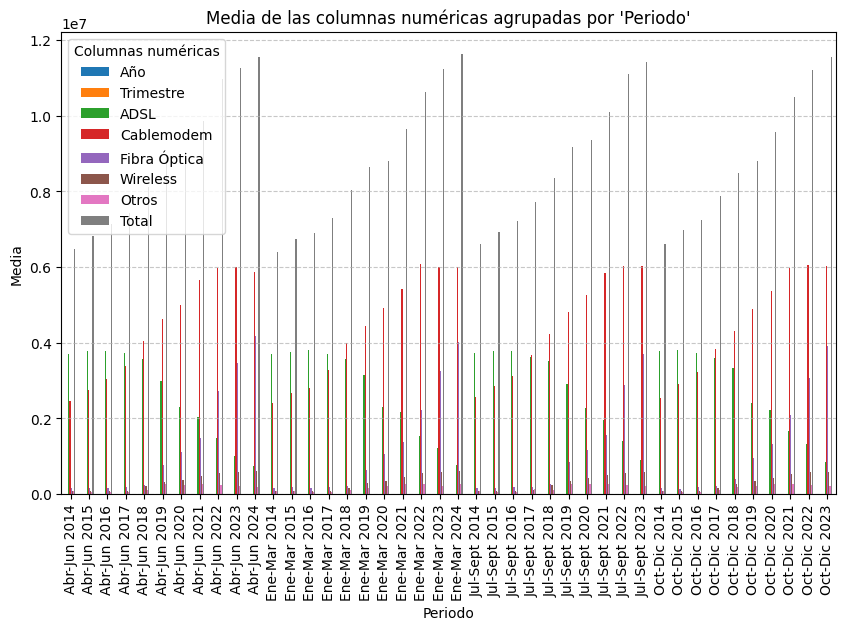


Estadísticas por grupo de 'Trimestre_Label':
                    Año  Trimestre          ADSL    Cablemodem  Fibra Óptica  \
Trimestre_Label                                                                
Q1               2019.0        1.0  2.695318e+06  4.360562e+06  1.218766e+06   
Q2               2019.0        2.0  2.641130e+06  4.436464e+06  1.324732e+06   
Q3               2018.5        3.0  2.784142e+06  4.437982e+06  1.109879e+06   
Q4               2018.5        4.0  2.664110e+06  4.507696e+06  1.235986e+06   

                      Wireless          Otros         Total  
Trimestre_Label                                              
Q1               297252.090909  154828.909091  8.726726e+06  
Q2               310267.181818  157575.818182  8.870168e+06  
Q3               298616.600000  160752.900000  8.791373e+06  
Q4               311143.700000  159983.400000  8.878919e+06  


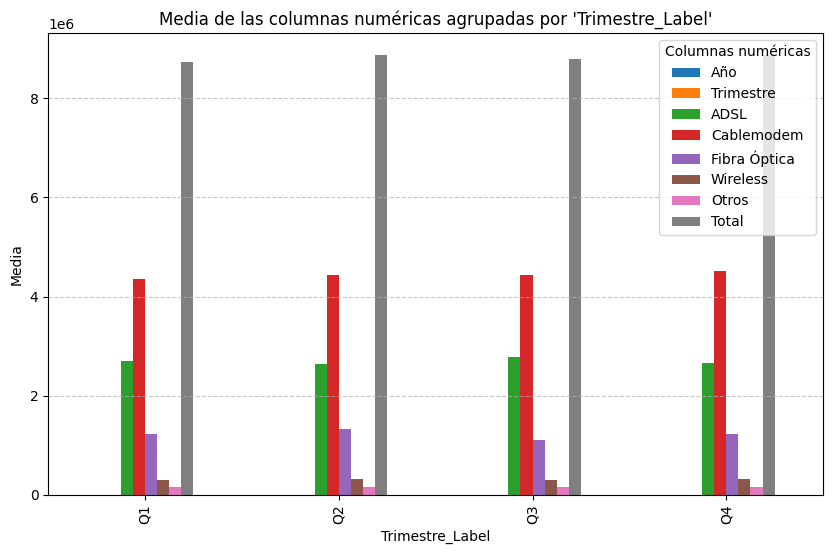

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


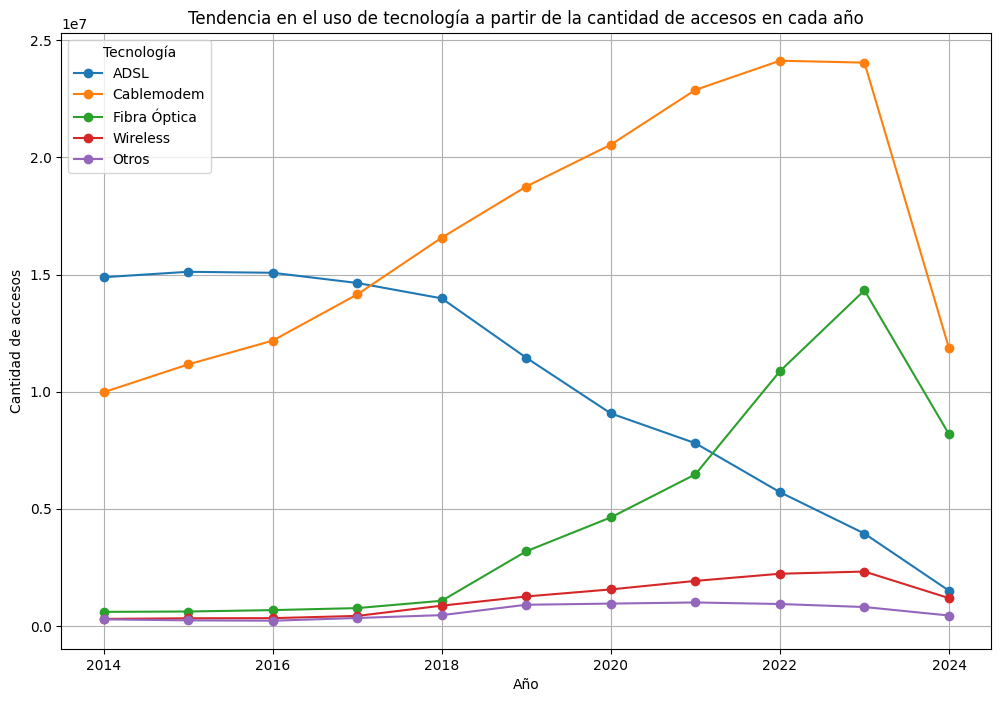

In [59]:
# Graficar la tendencia de cada tecnología a lo largo de los años
plt.figure(figsize=(12, 8))
for columna in ['ADSL', 'Cablemodem', 'Fibra Óptica', 'Wireless', 'Otros']:
    plt.plot(df_agrupado.index, df_agrupado[columna], marker='o', label=columna)

plt.title('Tendencia en el uso de tecnología a partir de la cantidad de accesos en cada año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()

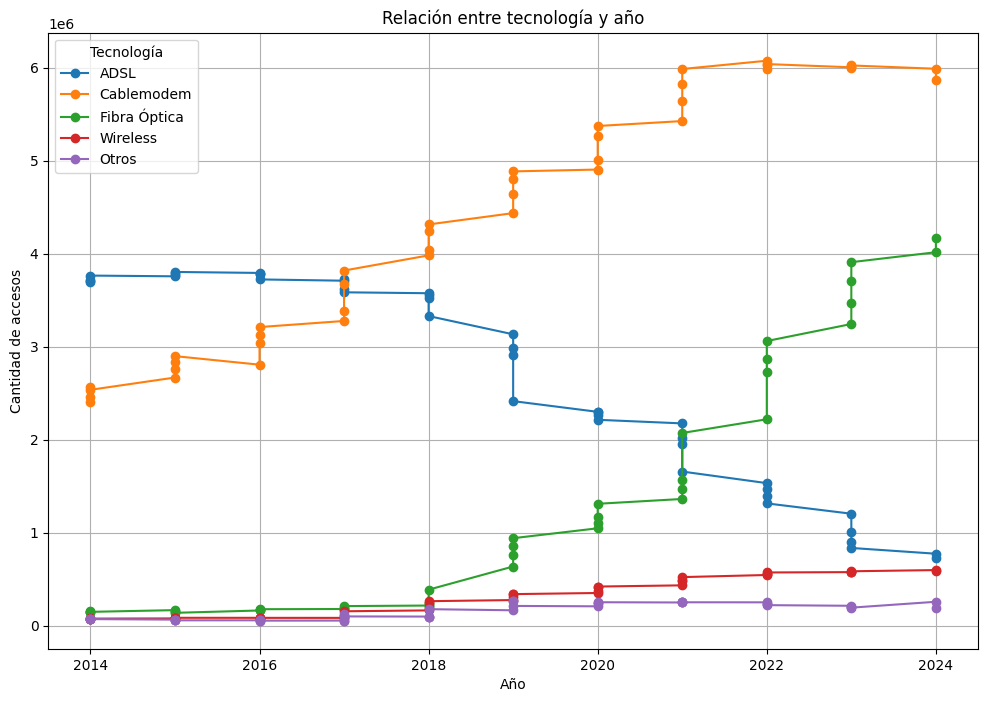

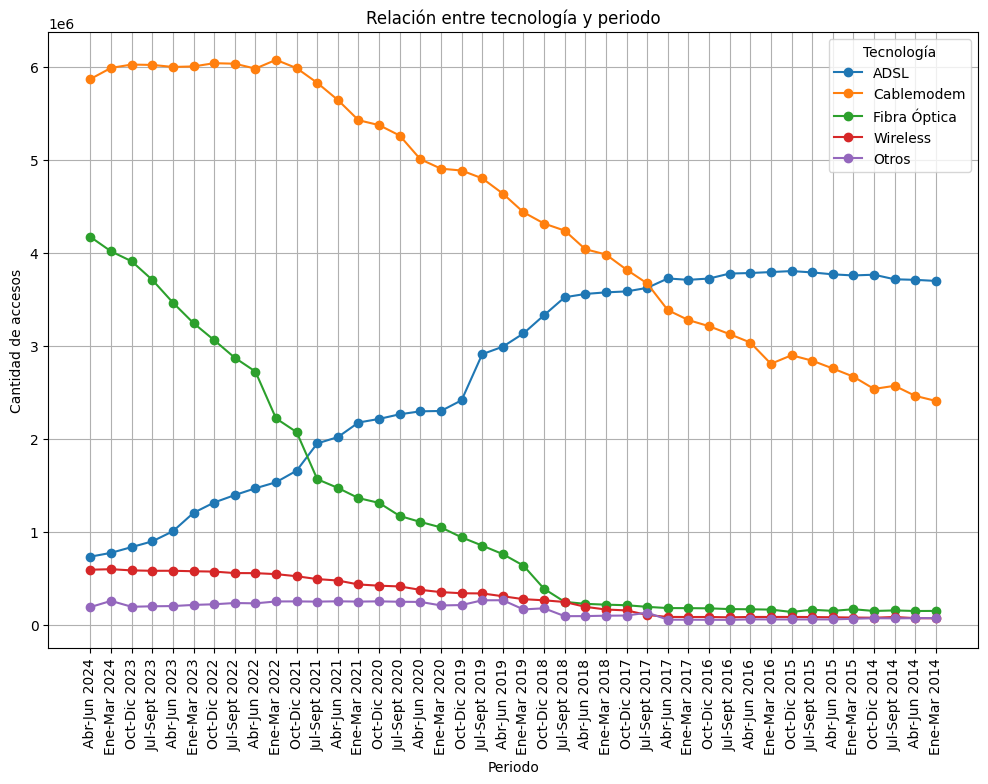

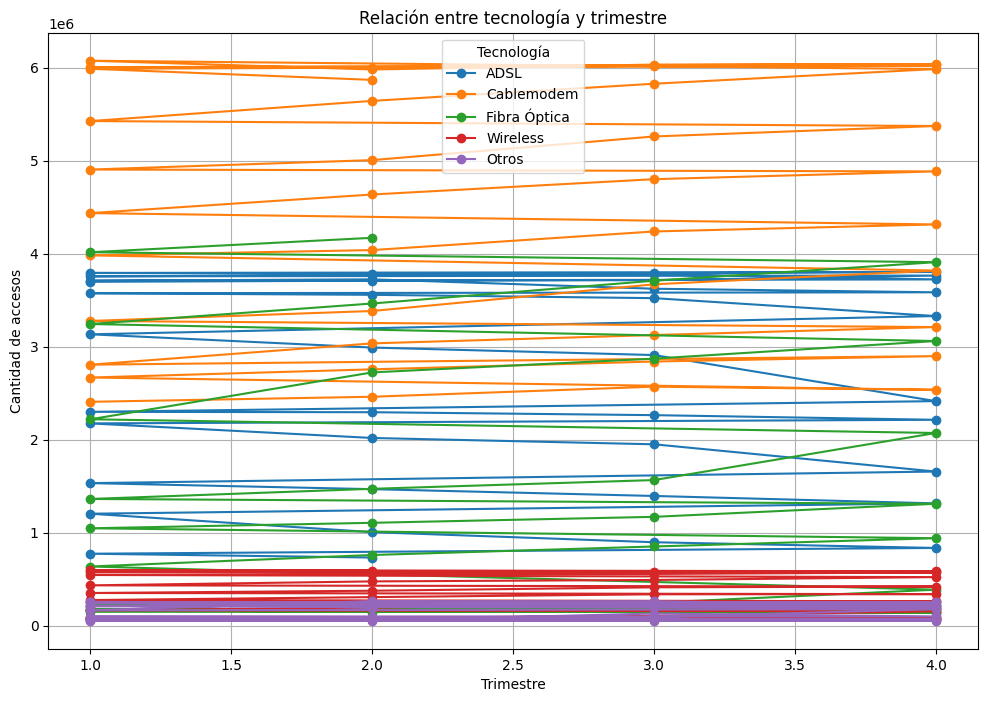

In [60]:
# Relación entre tecnología y año
plt.figure(figsize=(12, 8))
for columna in ['ADSL', 'Cablemodem', 'Fibra Óptica', 'Wireless', 'Otros']:
    plt.plot(df['Año'], df[columna], marker='o', label=columna)

plt.title('Relación entre tecnología y año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()

# Relación entre tecnología y periodo
plt.figure(figsize=(12, 8))
for columna in ['ADSL', 'Cablemodem', 'Fibra Óptica', 'Wireless', 'Otros']:
    plt.plot(df['Periodo'], df[columna], marker='o', label=columna)

plt.title('Relación entre tecnología y periodo')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Tecnología')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Relación entre tecnología y trimestre
plt.figure(figsize=(12, 8))
for columna in ['ADSL', 'Cablemodem', 'Fibra Óptica', 'Wireless', 'Otros']:
    plt.plot(df['Trimestre'], df[columna], marker='o', label=columna)

plt.title('Relación entre tecnología y trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()

# Análisis Exploratorio de Datos (EDA) - Totales Accesos Por Tecnología

## Introducción

Este análisis exploratorio de datos (EDA) se centra en los datos proporcionados por el **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo regulador de las telecomunicaciones en el país. El conjunto de datos utilizado en este análisis se titula **"Totales de accesos a internet desglosados por tecnología."** y proporciona una visión sobre las tecnologías predominantes en la conectividad de los usuarios en Argentina.

## Objetivo del Análisis

El propósito de este análisis es **comparar las tecnologías de conexión disponibles en Argentina**, detectando tendencias en el uso de ADSL, fibra Óptica, cable módem, entre otras.

## Contenido del Notebook

### 1. Cargar el archivo y normalizar los nombres
- Importación de las librerías necesarias.
- Carga del archivo CSV y verificación de su existencia.
- Extracción y visualización de los nombres de las columnas.

### 2. Verificación y conversión de tipos de datos
- Conversión de la columna `Trimestre` a tipo `int64` si no lo es.
- Creación de la columna `Trimestre_Label` basada en `Trimestre`.

### 3. Estadísticas descriptivas y análisis exploratorio
- Generación de estadísticas descriptivas para columnas numéricas y de tipo `object`.
- Visualización de histogramas para columnas numéricas.
- Agrupación de datos por año y suma de cantidades de accesos para cada tecnología.
- Visualización de tendencias en el uso de tecnología a lo largo de los años.

### 4. Análisis de correlación
- Cálculo y visualización de la matriz de correlación entre columnas numéricas.
- Análisis de correlación entre columnas no numéricas usando tablas de contingencia.

### 5. Análisis de valores atípicos y nulos
- Cálculo de Z-scores para columnas numéricas.
- Visualización de Z-scores y gráficos de caja para detectar valores atípicos.
- Conteo de categorías en columnas de tipo `object`.
- Revisión de columnas con valores negativos.
- Visualización de la cantidad de valores nulos por columna.

### 6. Análisis de distribuciones
- Cálculo de skewness (asimetría) y kurtosis (curtosis) para columnas numéricas.
- Verificación de la existencia de multicolinealidad entre variables numéricas usando el Factor de Inflación de la Varianza (VIF).

### 7. Visualización de relaciones entre variables
- Visualización de la relación entre variables numéricas usando pairplots.
- Agrupamiento por categorías y cálculo de estadísticas por grupo.
- Verificación de duplicados en el DataFrame.

### 8. Guardar cambios
- Guardado de los cambios realizados en el DataFrame en el mismo archivo CSV.

## Conclusiones

Este análisis proporciona una visión detallada de las tendencias y patrones en el uso de diferentes tecnologías de conexión a internet en Argentina. A través de diversas técnicas de visualización y análisis estadístico, se han identificado correlaciones, valores atípicos y distribuciones de datos que pueden ser útiles para la toma de decisiones y la planificación estratégica en el ámbito de las telecomunicaciones.

## Requisitos

- Python 3.x
- Librerías: pandas, numpy, matplotlib, seaborn, os, sweetviz, skimpy, scipy, statsmodels

## Uso

Para ejecutar este análisis, simplemente abre el archivo Jupyter Notebook y ejecuta las celdas en orden. Asegúrate de tener el archivo CSV en la ruta especificada y las librerías necesarias instaladas.
